In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
data= load_breast_cancer()
data.data.shape
# 样本太少，特征太多，容易过拟合

(569, 30)

In [9]:
rfc=RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


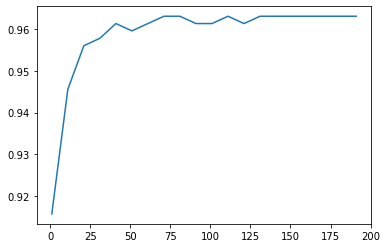

In [13]:
scorel=[]
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1,
    n_jobs=-1,random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))*10+1)
plt.plot(range(1,201,10),scorel)
plt.show()
#说明71附近比较好

0.9666353383458647 72


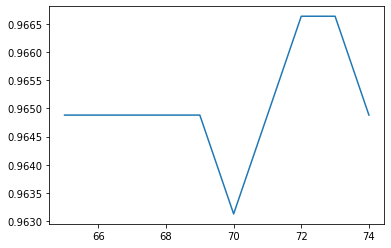

In [15]:
scorel=[]
for i in range(65,75):
    rfc=RandomForestClassifier(n_estimators=i+1,
    n_jobs=-1,random_state=90)
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),scorel.index(max(scorel))+65)
plt.plot(range(65,75),scorel)
plt.show()
#最终决定n_estimators取72

In [17]:
param_grid={'max_depth':np.arange(1,20)}
#由于数据样本不多，基本1-10，1-20就够
rfc=RandomForestClassifier(n_estimators=72,random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_score_

0.9683897243107771

In [18]:
GS.best_params_

{'max_depth': 8}

In [19]:
param_grid={'max_depth':np.arange(10,15),'min_samples_leaf':np.arange(1,20)}
#由于数据样本不多，基本1-10，1-20就够
rfc=RandomForestClassifier(n_estimators=72,random_state=90)
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_score_
#更低了，没有调整的必要

0.9648809523809524